In [12]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
ITERATION = 8

In [13]:
# Save spectra to respective numpy files
spectra_2d = np.load("./2D/data/spectra_%d.npy"%ITERATION)
spectra_6d = np.load("./6D/data/spectra_%d.npy"%ITERATION)
wavelength = np.load("./2D/data/wav.npy")
df = pd.read_excel('./uvvis/1.xlsx', engine='openpyxl')
water = df.values[:,-1]

## 2D experiment uv-vis

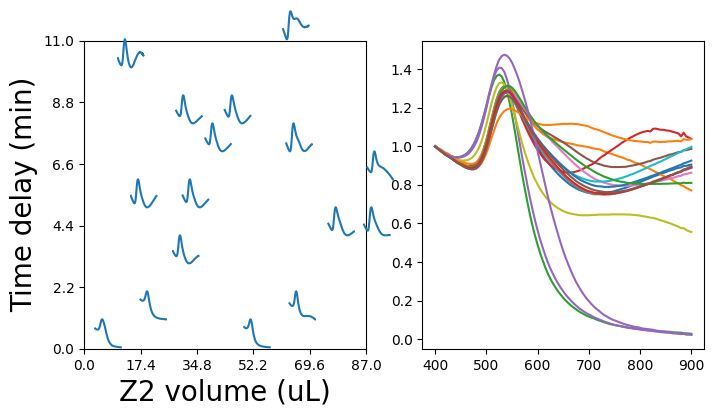

In [24]:
import sys 
sys.path.append("/Users/pozzolabadmin/Documents/codebase/experiments/peptide_phase_mapping")
from utils import plot_phasemap

volume_df = pd.read_csv('./2D/opentrons/volumes_%d.csv'%ITERATION)
time_df = pd.read_csv('./2D/opentrons/times_%d.csv'%ITERATION)
bounds = np.asarray([(0.0, 87.0), (0.0,11.0)]).T
fig, axs = plt.subplots(1,2, figsize=(4*2, 4))
comps = np.vstack((volume_df['Z2'].values, time_df['DT4'].values)).T
plot_phasemap(bounds, axs[0], comps, spectra_2d)
# for i in range(comps.shape[0]):
#     axs[0].text(comps[i,0], comps[i,1], i)
axs[0].set_xlabel('Z2 volume (uL)', fontsize=20)
axs[0].set_ylabel('Time delay (min)', fontsize=20) 

for si in spectra_2d:
    axs[1].plot(wavelength, si/si[0])
plt.show()


## 6D Experiment UV-Vis

Index 	 Volumes in µL
59 	 [124, 67, 19, 11, 57]
63 	 [184, 70, 0, 0, 24]
69 	 [118, 25, 69, 2, 64]


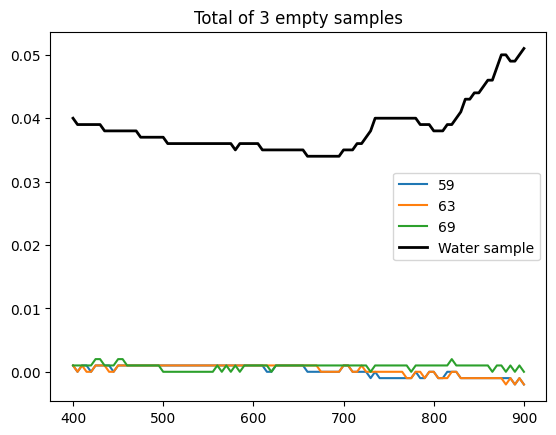

In [15]:
volume_df = pd.read_csv('./6D/opentrons/volumes_%d.csv'%ITERATION)
fig, ax = plt.subplots()
print("Index", "\t", "Volumes in µL")
counter = 0
for i,si in enumerate(spectra_6d):
    if (si<0.05).all():
        print(i, "\t", volume_df.iloc[i,:].to_list())
        ax.plot(wavelength, si, label=i)
        counter += 1
ax.plot(wavelength, water, label="Water sample", color='k', lw=2.0)
ax.set_title("Total of %d empty samples"%counter)
ax.legend()
plt.show()

In [16]:
spectra_2d.shape, spectra_6d.shape, volume_df.shape

((16, 101), (78, 101), (78, 5))

In [17]:
assert spectra_6d.shape[0]==volume_df.shape[0]

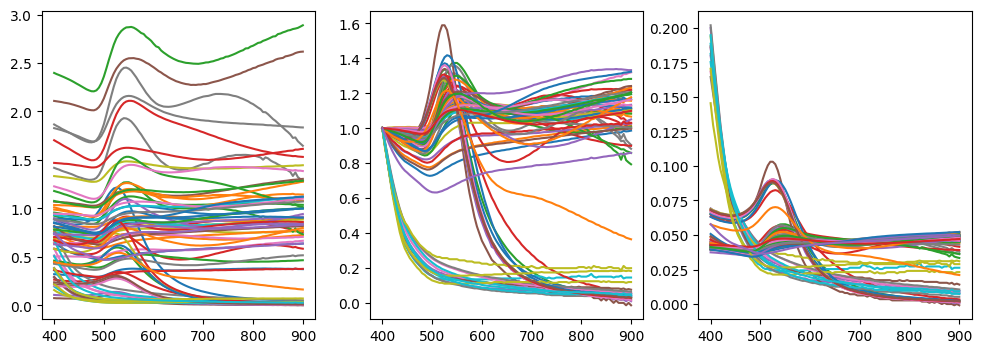

In [18]:
fig, axs = plt.subplots(1,3, figsize=(4*3, 4))
for i,si in enumerate(spectra_6d):
    if not (si<0.05).all():
        axs[0].plot(wavelength, si)
        axs[1].plot(wavelength, si/si[0])
        norm = np.sqrt(np.trapz(si**2, wavelength))
        axs[2].plot(wavelength, si/norm)

plt.show()

## Unused but useful code

In [19]:
# import numpy as np
# from sklearn import manifold
# from scipy.spatial.distance import cdist
# seed = np.random.RandomState(seed=2050)
# import itertools as it 

# class ManifoldGridViz:
#     def __init__(self, num_grid_samples, dim):
#         self.nx = num_grid_samples 
#         self.dim = dim 
#         el = np.array([i/self.nx for i in range(self.nx+1)])
#         self.grid = np.array([x for x in it.product(el, repeat=self.dim) if np.isclose(np.sum(x),1)])

#     def reduce(self, **kwargs):
#         self.m = manifold.MDS(n_components=2, **kwargs)
#         self.m.fit(self.grid, **kwargs)
#         self.pos = self.m.embedding_

#         return 

#     def look_up(self, x):
#         dist = cdist(x.reshape(1,-1), self.grid)
#         idx = np.argmin(dist)

#         return self.pos[idx,:]


In [20]:
# import sys 
# sys.path.append("/Users/pozzolabadmin/Documents/codebase/experiments/peptide_phase_mapping/04012024/6D")
# from viz import ManifoldGridViz

# inary = 4
# viz = ManifoldGridViz(num_grid_samples=15, dim=inary)
# viz.reduce() 

# corners = np.eye(inary)
# POS_CORNERS = np.asarray([viz.look_up(ci) for ci in corners])
# POS_ZERO = viz.look_up(np.zeros(inary))
# CORNER_NAMES = ["HEPES", "Z2M246I", "Au", "Z2"]

In [21]:
# # Visualize 6D design space
# import matplotlib
# from botorch.utils.transforms import normalize

# CMAP = matplotlib.colormaps['plasma']
# NORM = matplotlib.colors.Normalize(vmin=0, vmax=11.0)
# MAPPABLE = matplotlib.cm.ScalarMappable(norm=NORM, cmap=CMAP)


# def plot_6d(ax, viz, itr):
#     spectra = np.load("./6D/data/spectra_%d.npy"%itr)
#     volume_df = pd.read_csv('./6D/opentrons/volumes_%d.csv'%itr)
#     time_df = pd.read_csv('./6D/opentrons/times_%d.csv'%itr)
#     time_delays_z2 = time_df['DT4'].values

#     volumes = volume_df.values[:,1:]
#     water = volume_df.values[:,0]
#     concentration = volumes/water[:,np.newaxis]
#     volfracs = concentration/concentration.sum(axis=1)[:,np.newaxis]
#     pos_data = np.asarray([viz.look_up(xi) for xi in volfracs]) 

#     bounds = np.vstack((viz.pos.min(axis=0), viz.pos.max(axis=0)))
#     for i, (ci, si) in enumerate(zip(pos_data, spectra)):
#         norm_ci = normalize(ci, bounds)
#         loc_ax = ax.transLimits.transform(norm_ci)
#         ins_ax = ax.inset_axes([loc_ax[0],loc_ax[1],0.08,0.08])
#         ins_ax.patch.set_alpha(0.1)
#         if (si<0.05).all():
#             ins_ax.plot(wavelength, si, color="k")
#             ins_ax.set_ylim([0, 1])
#         else:
#             ins_ax.plot(wavelength, si, color="k")
#         ins_ax.axis('off')
#     ax.scatter(viz.pos[:,0], viz.pos[:,1], color="k", alpha=0.02)
#     for i, cname in enumerate(CORNER_NAMES):
#         ax.text(POS_CORNERS[i,0], POS_CORNERS[i,1], cname)
#     ax.scatter(pos_data[:,0], pos_data[:,1], color=CMAP(NORM(time_delays_z2)))
#     ax.axis("off")
    
#     return 

In [22]:
# for i in range(ITERATION+1):
#     fig, ax = plt.subplots()
#     plot_6d(ax, viz, i)
#     ax.set_title("ITR %d"%i, y=1.05)
#     cax = plt.axes([0.975, 0.2, 0.01, 0.6])        
#     cbar = fig.colorbar(MAPPABLE, cax=cax)
#     cbar.ax.set_ylabel('Time delay', rotation=270)
#     plt.show()